In [9]:
import torch
import torch.nn as nn
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

1.0825088224469026e-05


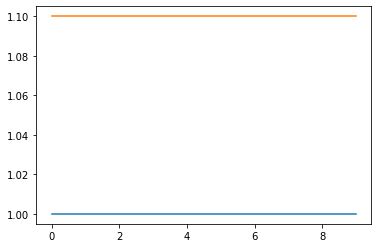

In [28]:
a = [1 for i in range(10)]
b = [1.1 for i in range(10)]
plt.plot(a)
plt.plot(b)
print(stats.ks_2samp(a,b)[1])

In [29]:
import importlib
import src.params as params
import src.model as model
import src.main as main
import src.dataloader as dataloader
importlib.reload(dataloader)
import numpy as np

In [35]:
args = params.get_args("../config/system_a.yaml")

In [31]:
data = main.get_cmdb(args)

Loading preprocessed data from /home/junetheriver/code/aiops/workdir/system_a/data_pre.pkl


In [72]:
dataset,valid,test = main.get_dataset(args)

Loaded ground truth from gt_pre.pkl


In [40]:
for x,y in dataset:
    print(x,y)

('gjjcore3', 27361.032171432176) [0. 0. 0. 0. 1. 0. 0. 0.]
('gjjha1', 23233.042981517316) [0. 0. 0. 1. 0. 0. 0. 0.]
('gjjcore3', 36557.024901783465) [1. 0. 0. 0. 0. 0. 0. 0.]
('gjjcore1', 18821.024653434753) [0. 1. 0. 0. 0. 0. 0. 0.]
('gjjcore8', 862.0405837337177) [0. 0. 0. 0. 0. 1. 0. 0.]
('gjjcore2', 19369.02466955185) [1. 0. 0. 0. 0. 0. 0. 0.]
('gjjbps1', 23625.041623850662) [0. 0. 0. 1. 0. 0. 0. 0.]
('gjjcore5', 26948.02453416586) [1. 0. 0. 0. 0. 0. 0. 0.]
('gjjcore9', 27667.024533899625) [0. 1. 0. 0. 0. 0. 0. 0.]
('gjjcore5', 1200.038751800855) [0. 1. 0. 0. 0. 0. 0. 0.]
('gjjcore3', 23981.024812301) [0. 1. 0. 0. 0. 0. 0. 0.]
('gjjuaap1', 23677.025480282307) [0. 0. 0. 0. 1. 0. 0. 0.]
('gjjcore9', 18620.042517618338) [0. 0. 0. 0. 0. 0. 0. 1.]
('gjjha1', 37506.042908132076) [0. 0. 0. 1. 0. 0. 0. 0.]
('gjjha3', 27201.02477751573) [0. 1. 0. 0. 0. 0. 0. 0.]
('gjjcore9', 23010.04226309856) [0. 0. 0. 0. 0. 0. 0. 1.]
('gjjha3', 29305.024502281347) [1. 0. 0. 0. 0. 0. 0. 0.]
('gjjha2', 2435

In [82]:
dataset = dataset+valid+test
len(dataset)

701

max is  675


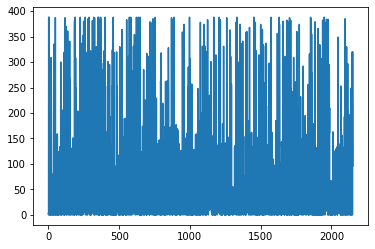

In [74]:
max = 0
freq = np.zeros((2152,))
for x,y in dataset:
    x = int(x[1])
    a = model.get_kpi_at_time(data, x, 10)
    b = model.get_kpi_at_time(data, x-10, 20)
    cnt = 0
    for i in range(2152):
        p = stats.ks_2samp(a[:,i], b[:,i])[1]
        if p < 0.05:
            # print(p)
            freq[i] += 1
            cnt+= 1
    if max < cnt:
        max = cnt
print("max is ", max)
plt.plot(freq)

(array([1298.,  242.,   97.,  197.,   69.,   37.,   47.,   31.,   44.,
          90.]),
 array([  0. ,  23.2,  46.4,  69.6,  92.8, 116. , 139.2, 162.4, 185.6,
        208.8, 232. ]),
 <BarContainer object of 10 artists>)

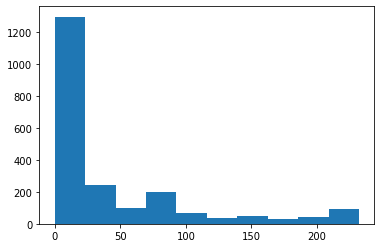

In [61]:
plt.hist(freq)

In [76]:
freq_id = np.argsort(freq)

In [78]:
freq_id[-1]

572

In [80]:
freq[572]

388.0